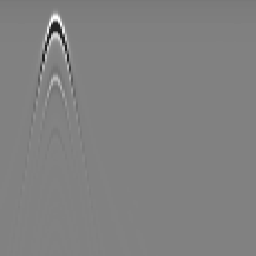

In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import signal
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as K
from PIL.ImageOps import invert

np.random.seed(1234)
tf.set_random_seed(1234)

os.environ["CUDA_VISIBLE_DEVICES"]="2"


img = image.load_img("/home/will/dev/gpr-learn/Metallic_plastic_none/Metallic 500/metallic98.png", color_mode='grayscale')
img = img.resize((256, 256))
test = image.img_to_array(img)[32:, :, :]
img = image.array_to_img(test)
img = img.resize((256,256))
test = image.img_to_array(img)
img

In [2]:
test.shape

(256, 256, 1)

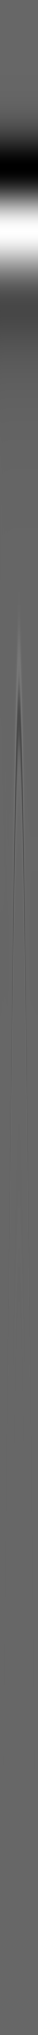

In [3]:
df = pd.read_csv('/var/pylon/notebook/speech/gan-research/a-scans/case118.csv')
image.array_to_img(np.expand_dims(df, -1))


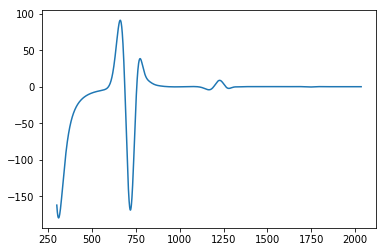

In [4]:
#print(df.describe())
df.iloc[300:, 19].plot()

(1025, 110)
2035


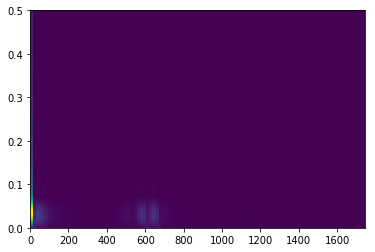

In [28]:
f, t, zxx = signal.stft(df.iloc[300:,24], window='hann', nperseg=32, nfft=2048, detrend='constant')
print(zxx.shape)
plt.pcolormesh(t, f, np.abs(zxx))
print(len(df))

(256, 256, 1)
(245, 127)
(245, 1025)
(245, 127)
0.5


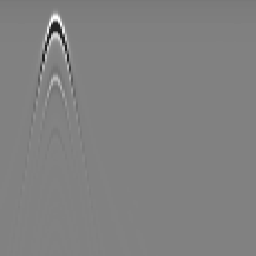

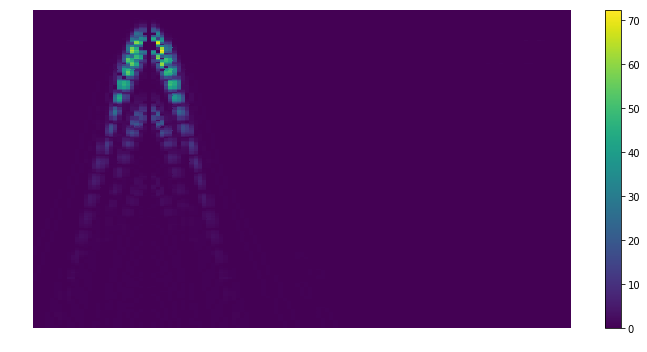

In [30]:
print(test.shape)

def stft(inputs, index):
    f, t, zxx = signal.stft(inputs[index, :, 0],window='hann', nperseg=4, nfft=2048, detrend='constant', padded=None, boundary=None)
    return f, t, zxx

spects = []
freqs = []
times = []
for i in range(245):
    f, t, zxx = stft(test, i)
    freqs.append(f)
    times.append(t)
    spects.append(np.abs(zxx))
    
spects = np.array(spects)
freqs = np.array(freqs)
times = np.array(times)
spects = np.amax(spects, axis=1)
print(spects.shape)
print(freqs.shape)
print(times.shape)

print(freqs.max())
plt.figure(figsize=(10,5)).patch.set_facecolor('white')
plt.xlim(0, len(spects[0,:]))
plt.ylim(len(spects[:,0]), 0)
plt.pcolormesh(spects)
plt.axis('off')
plt.tight_layout()
plt.colorbar()
plt.savefig('spectrogram.png')
img

In [7]:
spects

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.29389536, 0.27135733, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.29389536, 0.34062085, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.29389536, 0.34062085, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

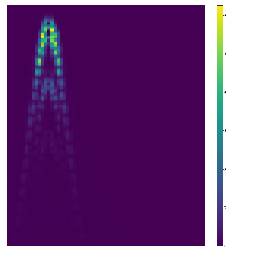

In [8]:
image.load_img('spectrogram.png').resize((256,256))